<h1>Table of Contents</h1>
<div class="toc">
    <li>
        <a href="#Main-concepts-of-Probability">Main concepts of Probability</a>
    </li>
    <li>
        <a href="#Random-Sampling-and-Sample-Bias">Random Sampling and Sample Bias</a>
    </li>
    <li>
        <a href="#Sampling-Distribution-of-Sample-Statistic">Sampling Distribution of Sample Statistic</a>
    </li>
    <li>
        <a href="#Bootstrapping">Bootstrapping</a>
    </li>
    <li>
        <a href="#Confidence-Interval">Confidence Interval</a>
    </li>
    <li>
        <a href="#Bernoulli-and-Binomial-Distribution">Bernoulli and Binomial Distribution</a>
    </li>
    <li>
        <a href="#Poisson,-Exponential-and-Weibull-Distribution">Poisson, Exponential and Weibull Distribution</a>
    </li>
    <li>
        <a href="#Normal-Distribution">Normal Distribution</a>
    </li>
    <li>
        <a href="#Exact-Sampling-Distribution">Exact Sampling Distribution</a>
    </li>
    <li>
        <a href="#T-Distribution">T Distribution</a>
    </li>
    <li>
        <a href="#Chi-Square-Distribution">Chi Square Distribution</a>
    </li>
    <li>
        <a href="#F-Distribution">F Distribution</a>
    </li>
    <li>
        <a href="#Power-Law-Distribution-(Pareto)">Power Law Distribution (Pareto)</a>
    </li>
    <li>
        <a href="#LogNormal-Distribution">LogNormal Distribution</a>
    </li>
</div>

## Main concepts of Probability

1. Mutual exclusive events: Two or more events that do not occur simultaneously
   
   <b>P(A or B) = P(A) + P(B)</b>


2. Non mutual exclusive events: Two or more events that can occur simultaneously

   <b>P(A or B) = P(A) + P(B) - P(A and B)</b>


3. Independent events: Two or more events, which the chance of events occuring are not related.

   <b>P(A and B) = P(A) * P(B)</b>


4. Dependent events: Two or more events, which the chance of events occuring are related.

   <b>P(A and B) = P(A) * P(B|A)</b>

## Random Sampling and Sample Bias

Sample represents a subset from a larger dataset, while population represents the ideal dataset for a very large sample size.

Data scientists usually work with samples most of the time, since it is impossible to obtain data for the entire population of interest.

There are four main sampling techniques available:
1. <b>Random sampling</b>: Selecting elements into a sample at random (Simple random sample)
2. <b>Stratified sampling</b>: Dividing population into strata (groups) and randomly sampling from every strata
3. <b>Cluster sampling</b>: Dividing population into multiple clusters (can have combined groups within same cluster) and randomly sample clusters from the population
4. <b>Systematic sampling</b>: Selecting elements from a random starting point, but with a fixed periodic interval

Note that both random sampling and stratified sampling techniques can be done with (bootstrapping) or without replacement

These sampling techniques could lead to occurence of bias if not done properly.

Bias in statistics refers to measurement or sampling errors that are systematic and not caused by random chance.

A specific concern for data scientists when reviewing large data sets is the vast search effect, which is bias from repeated data modelling or modelling data with large number of predictor variables.

To overcome vast search effect, one or more holdout sets may be used to validate model performance.

The following codes below show the difference between random sampling and stratified sampling of a given dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from sklearn.utils import resample
data = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/mlb_players.csv', sep=',\s*', engine='python').dropna()

In [2]:
# Random sampling without replacement
train = data.sample(frac=0.7)
test = data.drop(train.index)
len(train),len(test)

(724, 310)

In [3]:
train_y = train['"Position"']
test_y = test['"Position"']
train_prop = pd.Series(train_y.value_counts()/len(train_y))
test_prop = pd.Series(test_y.value_counts()/len(test_y))
pd.DataFrame([train_prop, test_prop, train_prop-test_prop],index = ['train','test','difference'])

,"""Relief Pitcher""","""Starting Pitcher""","""Outfielder""","""Catcher""","""Second Baseman""","""First Baseman""","""Shortstop""","""Third Baseman""","""Designated Hitter"""
train,0.309392,0.211326,0.191989,0.070442,0.059392,0.048343,0.046961,0.046961,0.015193
test,0.293548,0.219355,0.177419,0.080645,0.048387,0.064516,0.058065,0.035484,0.022581
difference,0.015844,-0.008029,0.014570,-0.010203,0.011005,-0.016174,-0.011103,0.011477,-0.007387


In [4]:
# Stratified sampling without replacement
train = data.groupby('"Position"', group_keys=False).apply(lambda x: x.sample(frac=0.7))
test = data.drop(train.index)
len(train),len(test)

(723, 311)

In [5]:
train_y = train['"Position"']
test_y = test['"Position"']
train_prop = pd.Series(train_y.value_counts()/len(train_y))
test_prop = pd.Series(test_y.value_counts()/len(test_y))
pd.DataFrame([train_prop, test_prop, train_prop-test_prop],index = ['train','test','difference'])

,"""Relief Pitcher""","""Starting Pitcher""","""Outfielder""","""Catcher""","""Second Baseman""","""First Baseman""","""Shortstop""","""Third Baseman""","""Designated Hitter"""
train,0.304288,0.214385,0.188105,0.073306,0.056708,0.052559,0.049793,0.042877,0.017981
test,0.305466,0.212219,0.186495,0.073955,0.054662,0.054662,0.051447,0.045016,0.016077
difference,-0.001179,0.002166,0.001610,-0.000649,0.002046,-0.002104,-0.001654,-0.002139,0.001903


Stratified sampling ensures there is less proportion imbalance between training set and test set for every class at every iteration, compared to random sampling Since random sampling technique generates different training set and test set at every iteration, proportion of values between training set and test set varies for every iteration.

## Sampling Distribution of Sample Statistic

<b>Sampling distribution</b> refers to frequency distribution of sample statistic over many samples or resamples. This differs from data distribution, which refers to frequency distribution of individual values in a dataset.

From sampling distribution, <b>Central Limit Theorem</b> states that the tendency of <b>sampling distribution</b> to follow normal distribution as sample size increases. 

Note that data distribution may not necessarily be normally distributed for central limit theorem to apply as long as sample size is large enough and distribution is not too heavily skewed.

When working with sampling distributions, there is a clear distinction between standard deviation and standard error that needs to be addressed. While standard deviation represents variability of data points, <b>standard error</b> represents variability of sample statistic over a sampling distribution.

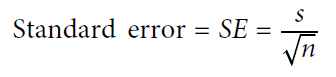

Data scientists should be aware of the use of Central Limit Theorem, however it only plays a small role in data science such that an alternative option to central limit theorem is using bootstrapping concept.

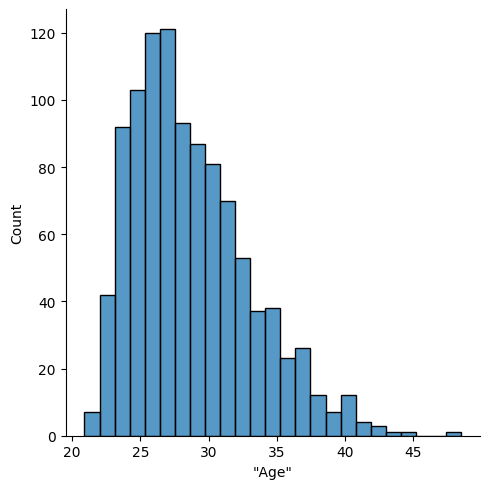

In [6]:
sns.displot(x = '"Age"', data=data, kind='hist')
plt.show()

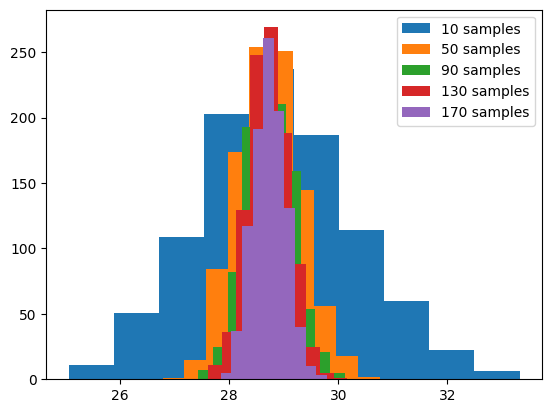

Mean of population: 28.736711798839462
Mean of sample: 28.73878935294118
Standard deviation of population: 4.320310037379981
Standard error of sample mean: 0.2933293988798154 ~ 0.33135265396363195


In [7]:
# Central Limit Theorem
for size in range(10,200,40):
    mean = []
    for count in range(1000):
        mean.append(data['"Age"'].sample(size).mean())
    plt.hist(mean)
plt.legend([str(size) + ' samples' for size in range(10,200,40)])
plt.show()
print("Mean of population:",data['"Age"'].mean())
print("Mean of sample:",np.mean(mean))
print("Standard deviation of population:",data['"Age"'].std())
print("Standard error of sample mean:",np.std(mean),"~",data['"Age"'].std()/np.sqrt(170))

## Bootstrapping

Bootstrapping simply refers to sampling with replacement from a given dataset.

Unlike Central Limit Theorem, bootstrapping does not require normality assumption of data or sample statistic being normally distributed.

Bootstrapping concept can be observed in predictive models, where multiple bootstrap sample predictions are aggregated (i.e. bagging method, random forest)

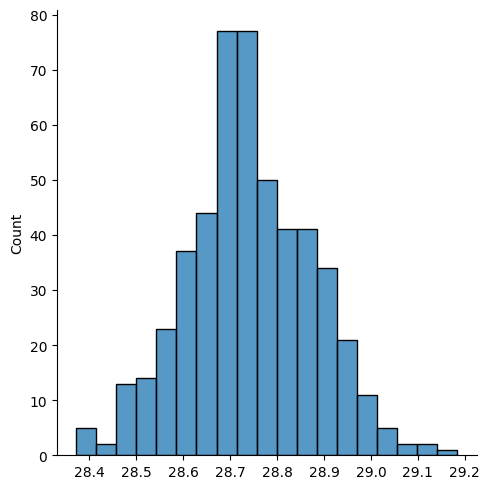

Original statistic (mean): 28.736711798839462
Bias: 0.002983152804638678
Standard error: 0.005966816843396309


In [8]:
# Bootstrapping example
results = []

for nrepeat in range(500):
    sample = resample(data['"Age"'])
    results.append(sample.mean())

sns.displot(results, kind='hist')
plt.show()
print("Original statistic (mean): "+str(data['"Age"'].mean()))
print("Bias: "+str(np.mean(results) - data['"Age"'].mean()))
print("Standard error: "+str(pd.Series(results).sem()))

## Confidence Interval

<b>Confidence level</b> represents the percentage of confidence interval from the same population that is expected to contain sample statistic.

Confidence level is usually determined based on domain knowledge, otherwise the default percentage used is 95%.

<b>Confidence interval</b> represents the interval that encloses central x% of sampling distribution of a sample statistic.

Confidence interval can be used to communicate the potential error of sample statistics and for making decisions of whether a larger sample size is needed.

Bootstrapping can be used to generate confidence intervals for larger sample size.



In [9]:
# t-distribution confidence interval for sample size < 30 with bootstrapping
for nsamples in range(2,30,5):
    sample = resample(data['"Age"'], n_samples=nsamples)
    print(f"95% C.I for {nsamples} samples",st.t.interval(alpha=0.95, df = len(sample)-1, loc=np.mean(sample), scale = st.sem(sample)))

95% C.I for 2 samples (15.25503621085434, 35.58496378914566)
95% C.I for 7 samples (26.184128140948637, 32.01872900190851)
95% C.I for 12 samples (26.66774738586959, 30.13391928079708)
95% C.I for 17 samples (26.9711840311386, 31.709992439449643)
95% C.I for 22 samples (27.8463544353803, 31.960918291892426)
95% C.I for 27 samples (27.357855367505614, 30.762144632494383)


In [10]:
# normal distribution confidence interval for sample size >= 30 with bootstrapping
for nsamples in range(30,1000,200):
    sample = resample(data['"Age"'], n_samples=nsamples)
    print(f"95% C.I for {nsamples} samples",st.norm.interval(alpha=0.95, loc=np.mean(sample), scale = st.sem(sample)))

95% C.I for 30 samples (27.853313219645383, 30.404020113687952)
95% C.I for 230 samples (28.152910825170224, 29.22969787048195)
95% C.I for 430 samples (28.14133846817583, 28.87782432252184)
95% C.I for 630 samples (28.614926336231417, 29.326089536784462)
95% C.I for 830 samples (28.406752996433113, 29.00066869031388)


## Bernoulli and Binomial Distribution

For a single trial with 2 possible outcomes, it follows a distribution known as <b>Bernoulli Distribution</b>.

![image.png](https://cdn-images-1.medium.com/max/1000/1%2AKS8aSSh8qRPmqUjrSjbPEg.png)

Mean of bernoulli distribution = p

Variance of bernoulli distribution = p*(1-p)

Binomial distribution represents the distribution of number of successes over a certain number of independent Bernoulli trials.

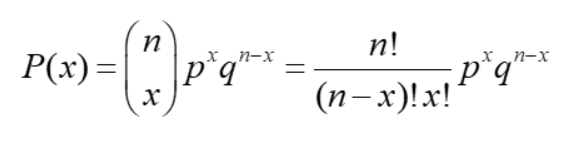

Note that possible values of x are non-negative integers (0,1,.....)

Mean of binomial distribution = n*p

Variance of binomial distribution = n*p*(1-p)

<b>Note that mean > variance for binomial distribution</b>

Binomial distribution involves the following assumptions:
1. Trials are finite and performed under same condition
2. Trials have 2 mutually exclusive binary outcomes
3. Probability of success is constant across all trials
4. Trials are independent

<b>Note that having a large sample size n and probability of success, p not being too close to 0 or 1 can be approximated by the normal distribution.</b>

In [11]:
# Probability mass function of binomial distribution with 2 success out of 5 trials with 0.1 probability of success
st.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

Note that probability mass function (pmf) is used for kernel density estimation of discrete quantitative variables. For continuous quantitative variables, probability density function (pdf) is used for kernel density estimation.

<b>Kernel density estimation</b> is a non-parametric method to smoothen data for estimating probability density, where points on the kernel density estimation are the sum of probabilities from multiple gaussian distribution curves plotted around the mean value of individual data points.

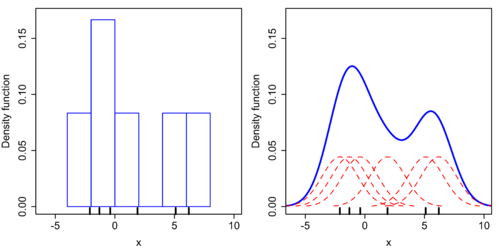

In [12]:
# Cumulative density function of binomial distribution up till 2 success out of 5 trials with 0.1 probability of success
st.binom.cdf(2, n=5, p=0.1)

0.99144

For two different binomial random variables (X1 ~ Binom(n1, p1) and X2 ~ Binom(n2, p2)):

X1 + X2 ~ Binom(n1 + n2, p) only if p1 = p2

## Negative Binomial Distribution

Unlike Binomial distribution, negative binomial distribution focuses on number of failures in sequence of independent Bernoulli trials before r number of success occurs (i.e. Number of failures before 3rd success)

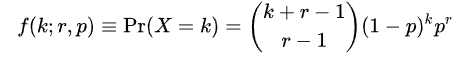

where r: number of success, k: number of failures and p: probability of success

Mean of negative binomial distribution: rp/(1-p)

Variancce of negative binomial distribution: rp(1-p)^2

<b>Note that mean < variance for negative binomial distribution</b>

In [13]:
# Probability mass function of negative binomial distribution with observing 3 failures before 10th success 
# with 0.6 probability of success
st.nbinom.pmf(k=3, n=10, p=0.6)

0.085136375808

In [14]:
# Cumulative density function of negative binomial distribution with observing up to 3 failures before 10th success 
# with 0.6 probability of success
st.nbinom.cdf(k=3, n=10, p=0.6)

0.168579698688

## Poisson, Exponential and Weibull Distribution

For measuring distribution related to event occurence, lambda measure is required, which represents the <b>rate of event occurence</b>.

Three distribution types related to event occurence:

1. <b>Poisson</b>: Frequency distribution of number of events within a fix sampled units of time. (i.e. number of website visitors per hour) - <b>Special case of binomial distribution where n approaches infinity and p approaches 0 value</b>.

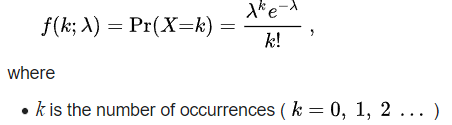

Note that λ value is non-negative.

Mean of Poisson distribution: λ

Variance of Poisson distribution: λ

<b>Note that mean = variance for Poisson distribution</b>

In [15]:
# Generating random variables of poisson distribution with 2 events per time period over 20 samples
st.poisson.rvs(2, size=20)

array([3, 2, 3, 3, 1, 2, 1, 2, 1, 4, 2, 1, 0, 3, 3, 3, 3, 1, 6, 2])

In [16]:
# Probability mass function of poisson distribution with 2 events per time period for 3 events occuring
st.poisson.pmf(3, mu=2)

0.18044704431548356

2. <b>Exponential</b>: Frequency distribution of time between two consecutive events with fix sampled unit of time. (i.e. time taken for green traffic light to turn red)

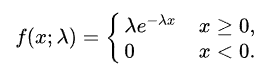

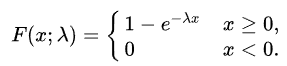

Mean of exponential distribution: 1/λ

Variance of exponential distribution: 1/λ^2

In [17]:
# Generating random variables of exponential distribution with 2 events per time period over 20 samples
st.expon.rvs(2, size=20)

array([4.54347548, 2.47722244, 3.25953556, 2.26650824, 4.30372683,
       2.28199797, 2.16291175, 2.5796852 , 2.70202406, 4.00760599,
       2.79406487, 2.15605565, 2.1995423 , 2.63510977, 2.5533247 ,
       2.43691178, 3.10206879, 3.07925406, 2.25599891, 2.18520434])

In [18]:
# Cumulative probability of exponential distribution with 2 events per time period on sample with zero mean and variance of one
st.expon.cdf(2)

0.8646647167633873

3. <b>Weibull</b>: Generalized version of exponential distribution with varying event rates over time. (i.e. time taken for machine failures - life data analysis)

In [19]:
# Generating random variables of weibull distribution with shape of 1.5 and characteristic life of 5000 over 20 samples
st.weibull_min.rvs(1.5, scale=5000, size=20)

array([ 4417.21126685,  4886.81193914,  5958.97154536,  2938.15115134,
        4208.56695004, 12543.03915257, 10515.94456978,  4192.74265836,
        1557.28289735,  1058.70718184,   994.78666471,  3273.18227844,
        5228.93474933,  2901.47760524,  3902.53218857,  3453.80397007,
        6040.94085614,  2385.7984007 ,  8574.1027007 ,  9587.33844411])

In [20]:
# Cumulative probability of weilbull distribution with shape of 1.5 and characteristic life of 5000 
# for event with characteristic life of 2000
st.weibull_min.cdf(2000,1.5,loc=0,scale=5000)

0.2235183068743822

## Normal Distribution

Probability density function of normal distribution with mean (mu) and variance (sigma-squared) is as follows:
![image3.png](https://cdn-5a6cb102f911c811e474f1cd.closte.com/wp-content/uploads/2017/11/Normal-Distribution-Probability-Density-Function.png)

For data to be normally distributed, distribution of data needs to satisfy the <b>empirical formulae</b> where:

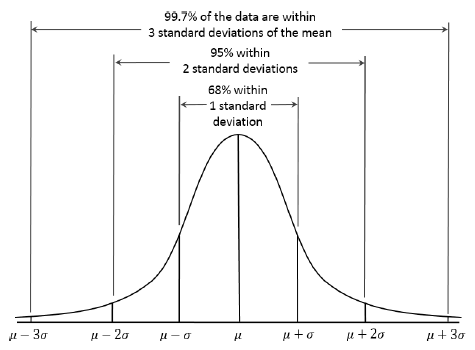

Note that for non-normal distribution, <b>Chebyshev's inequality (for k>=2)</b> states that:

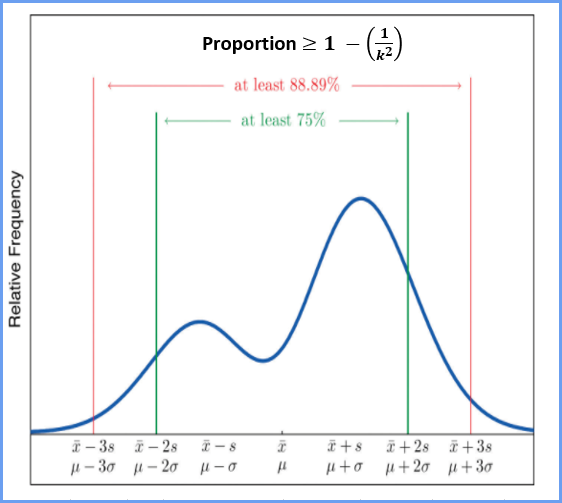

Gaussian normal distribution can be standardized into standard normal distribution with zero mean and standard deviation of one.

<b>X ~ N(mu, sigma-squared) -> Z ~ N(0,1)</b>

This transformation of data into standard normal distribution (z-distribution) is known as <b>standardization</b>.

For visual representation of how close a data distribution is to normal distribution, <b>Q-Q plot</b> is used. If most of the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal. Meanwhile, this can be represented by values for testing normality of data distribution using <b>Anderson test</b>.

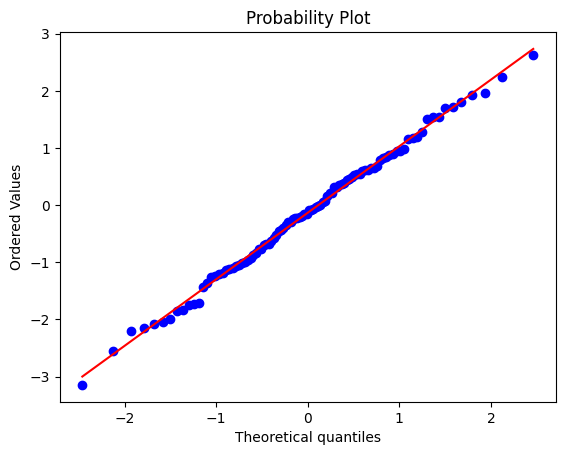

In [21]:
#QQ plot example for normal distribution
st.probplot(np.random.normal(size=100), dist='norm', plot=plt)
plt.show()

In [22]:
data = sns.load_dataset('brain_networks')
data = data.drop([0,1,2]).set_index('network').applymap(lambda x: float(x))

Note that features that are not normally distributed can be transformed to make it normally distributed using various transformation techniques. (More details covered in Feature Engineering section)

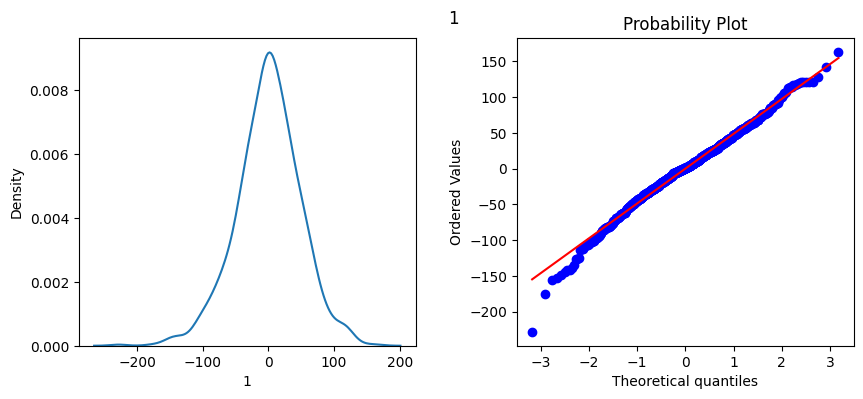

1 is not normally distributed


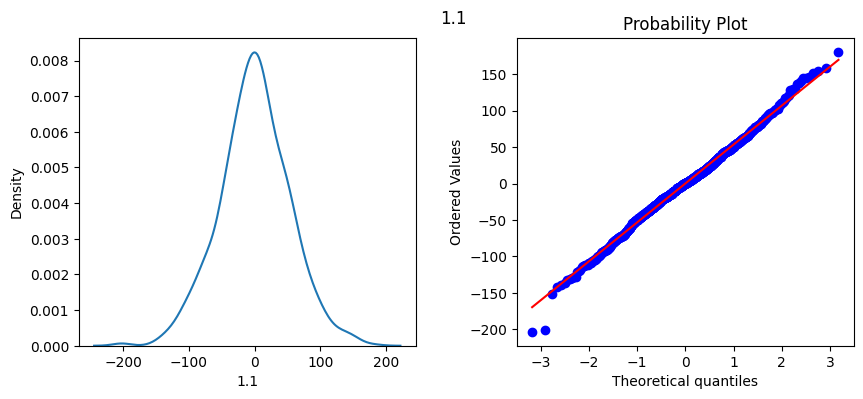

1.1 is not normally distributed


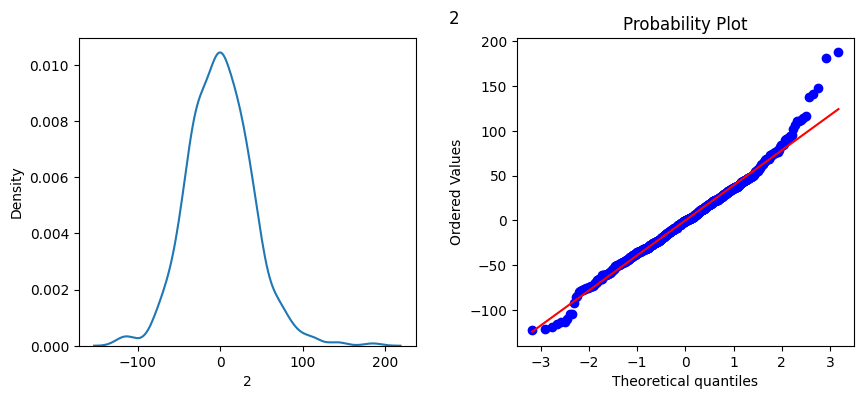

2 is not normally distributed


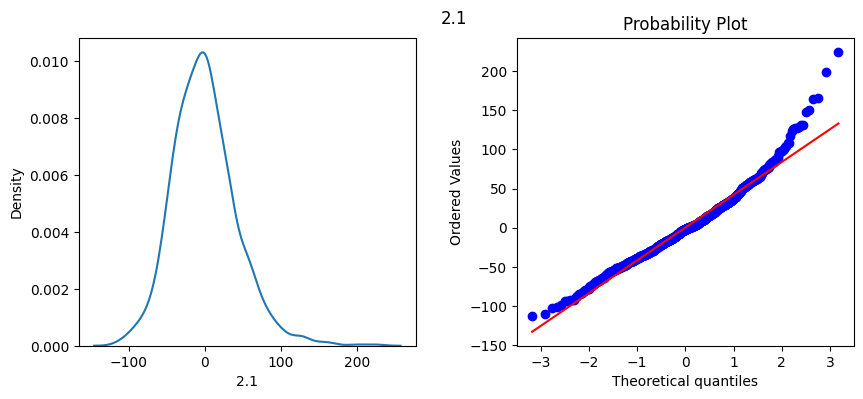

2.1 is not normally distributed


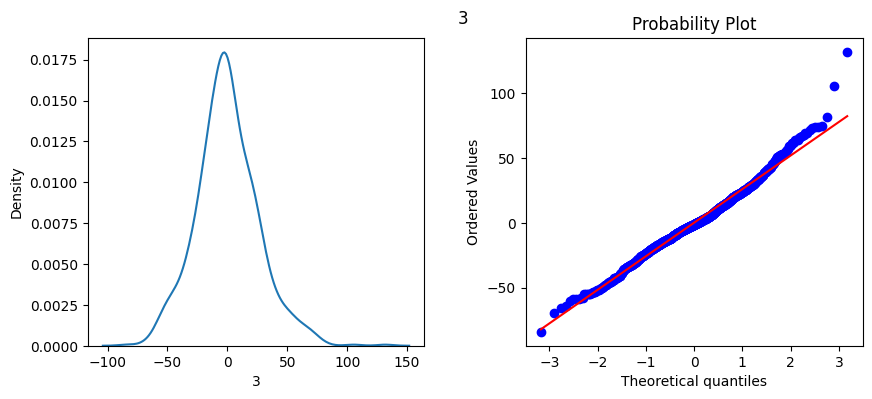

3 is not normally distributed


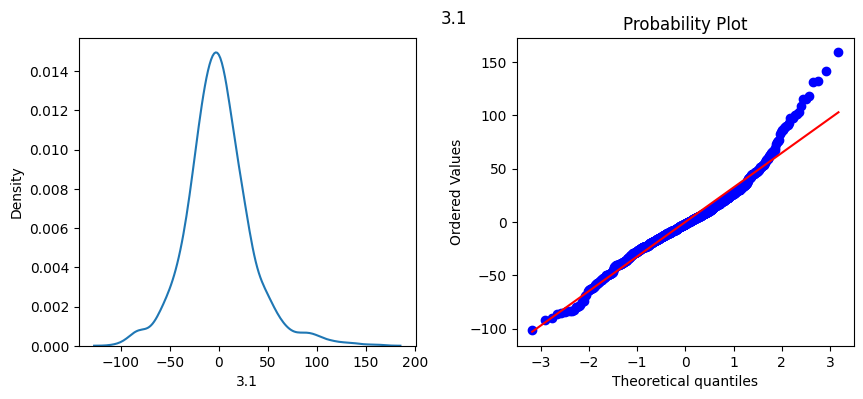

3.1 is not normally distributed


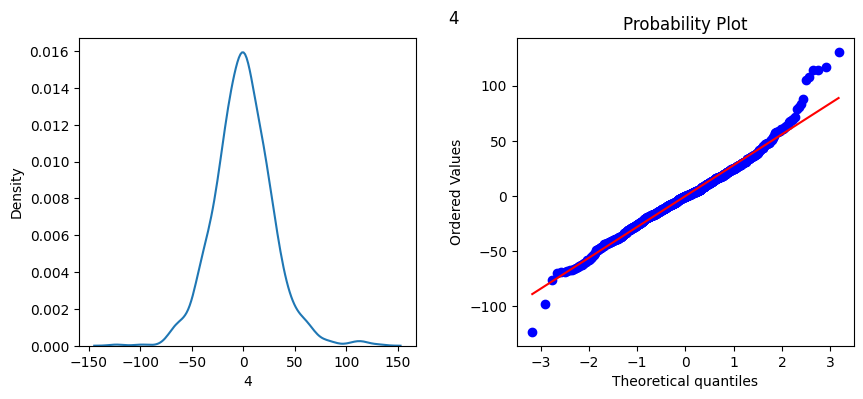

4 is not normally distributed


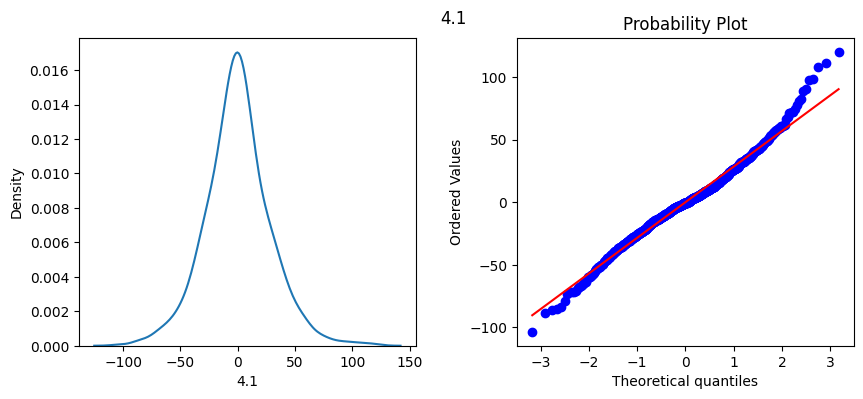

4.1 is not normally distributed


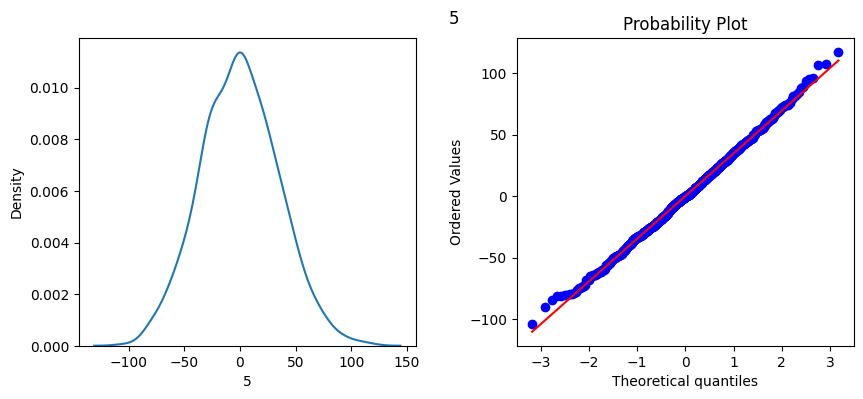

5 is normally distributed


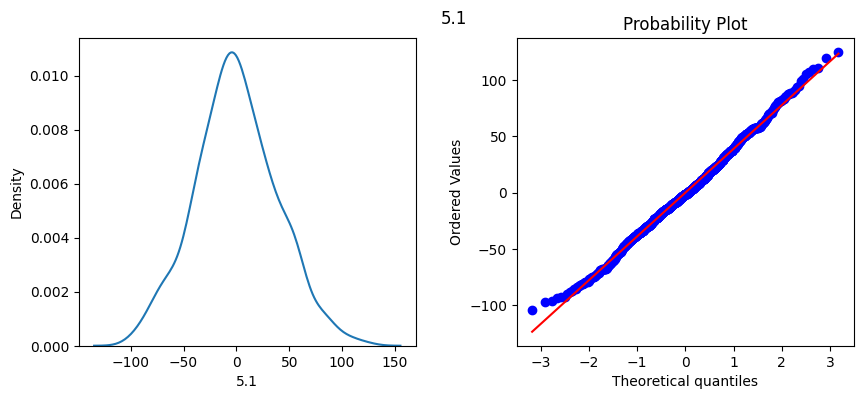

5.1 is normally distributed
List of columns not normally distributed: ['1', '1.1', '2', '2.1', '3', '3.1', '4', '4.1']


In [23]:
non_normal = []
# Normality test for the 1st 10 columns
for column in data.columns[:10]:
    f, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.kdeplot(data = data[column], ax=ax[0])
    st.probplot(data[column], dist='norm', plot=ax[1])
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.suptitle(column, y=0.95)
    plt.show()
    result = st.anderson(data[column],'norm')
    if result[0]>result[1][2]:
        print(f"{column} is not normally distributed")
        non_normal.append(column)
    else:
        print(f"{column} is normally distributed")
print(f"List of columns not normally distributed: {non_normal}")

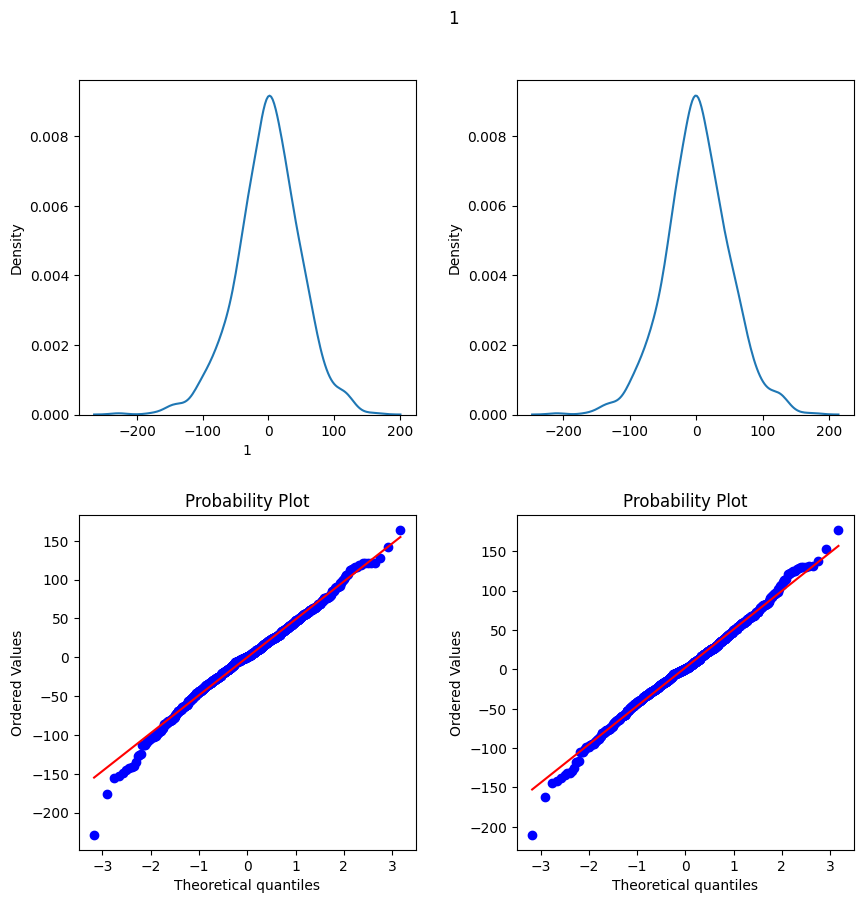

After yeo-johnsson transform, 1 is not normally distributed


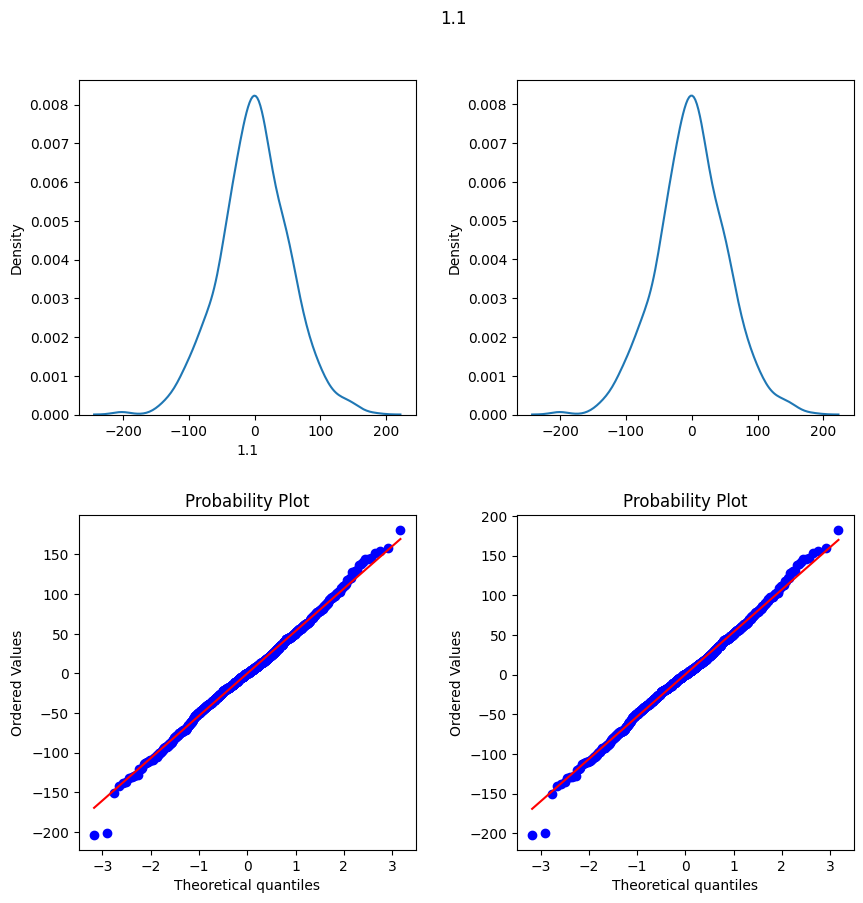

After yeo-johnsson transform, 1.1 is not normally distributed


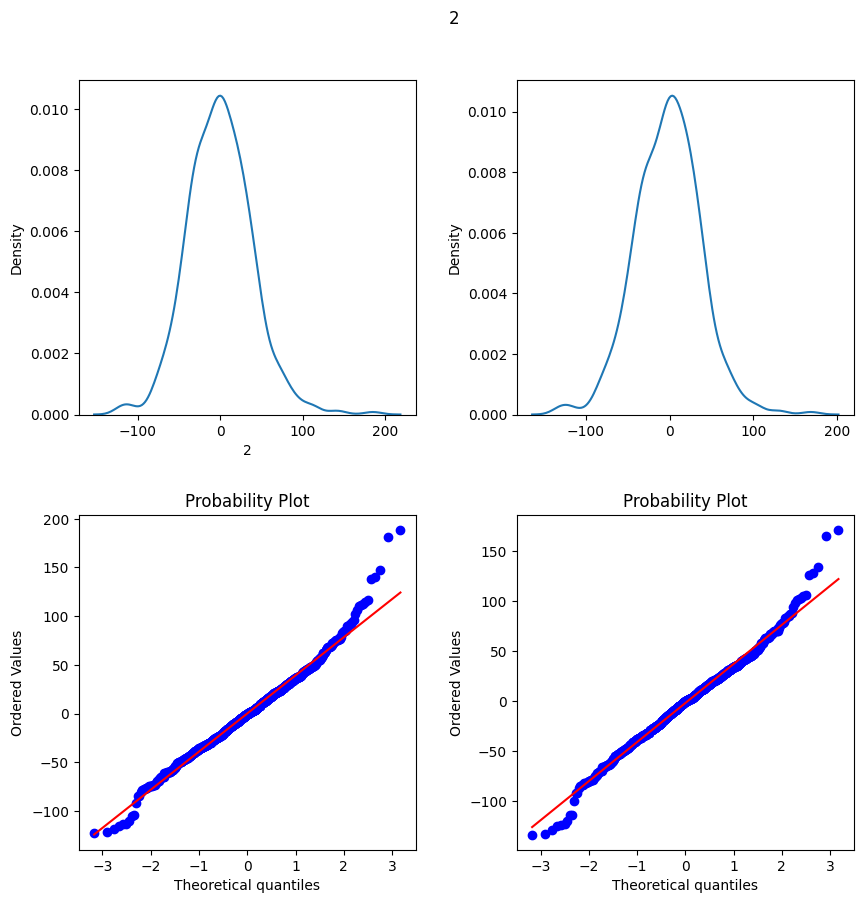

After yeo-johnsson transform, 2 is not normally distributed


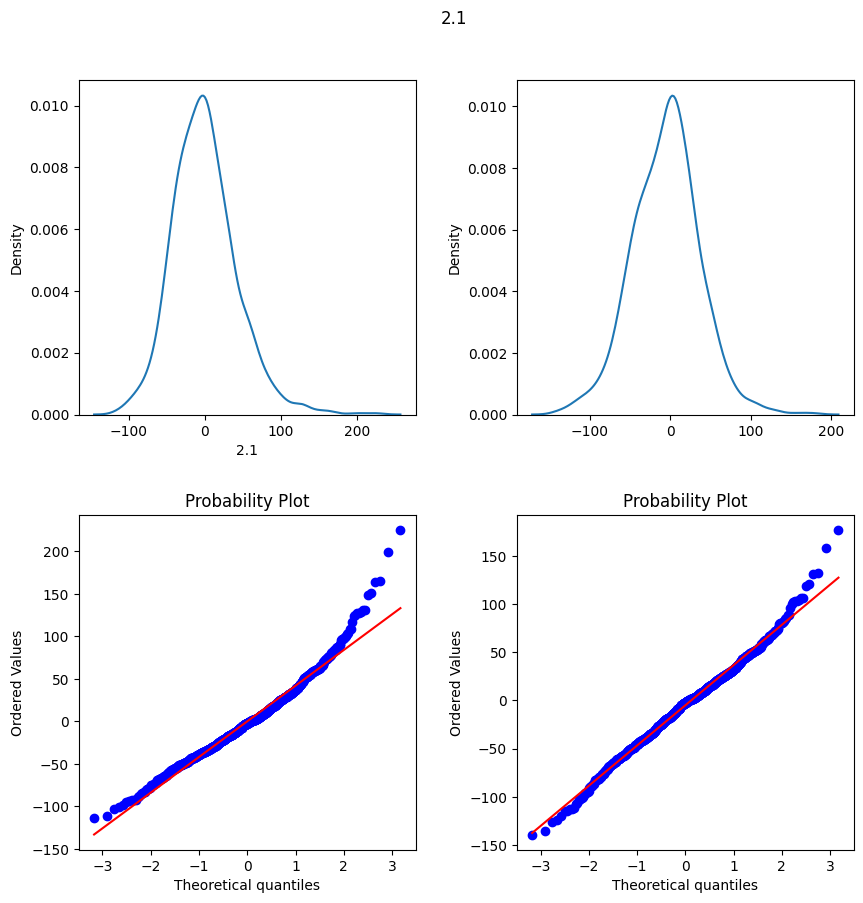

After yeo-johnsson transform, 2.1 is not normally distributed


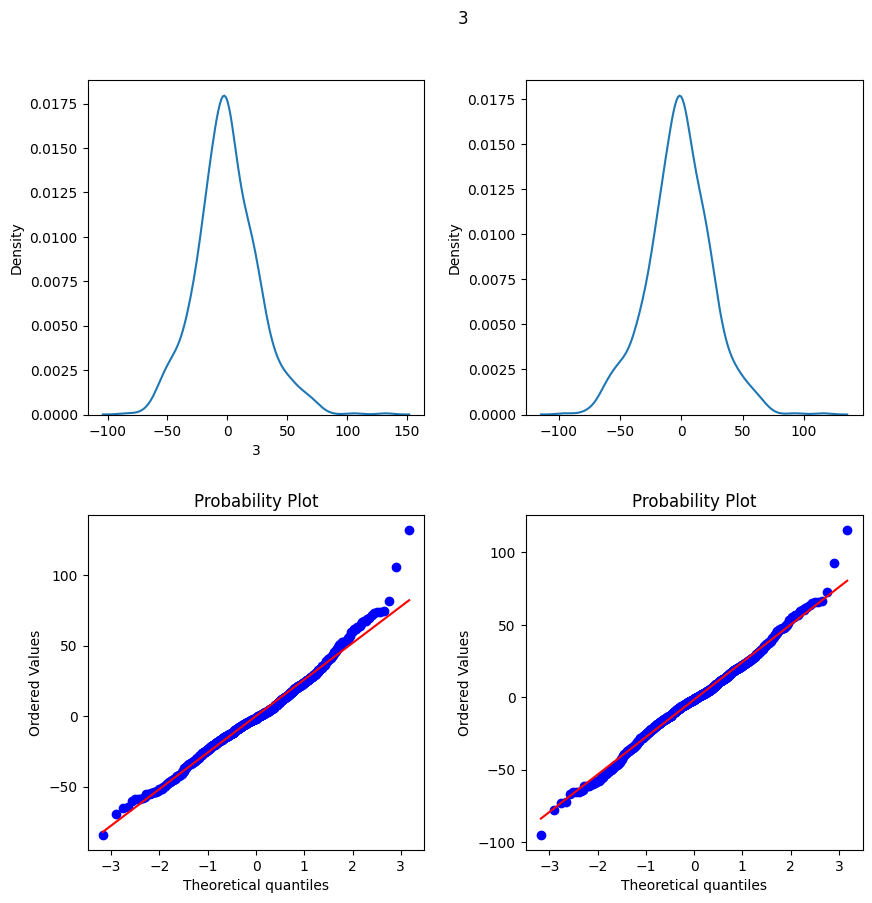

After yeo-johnsson transform, 3 is not normally distributed


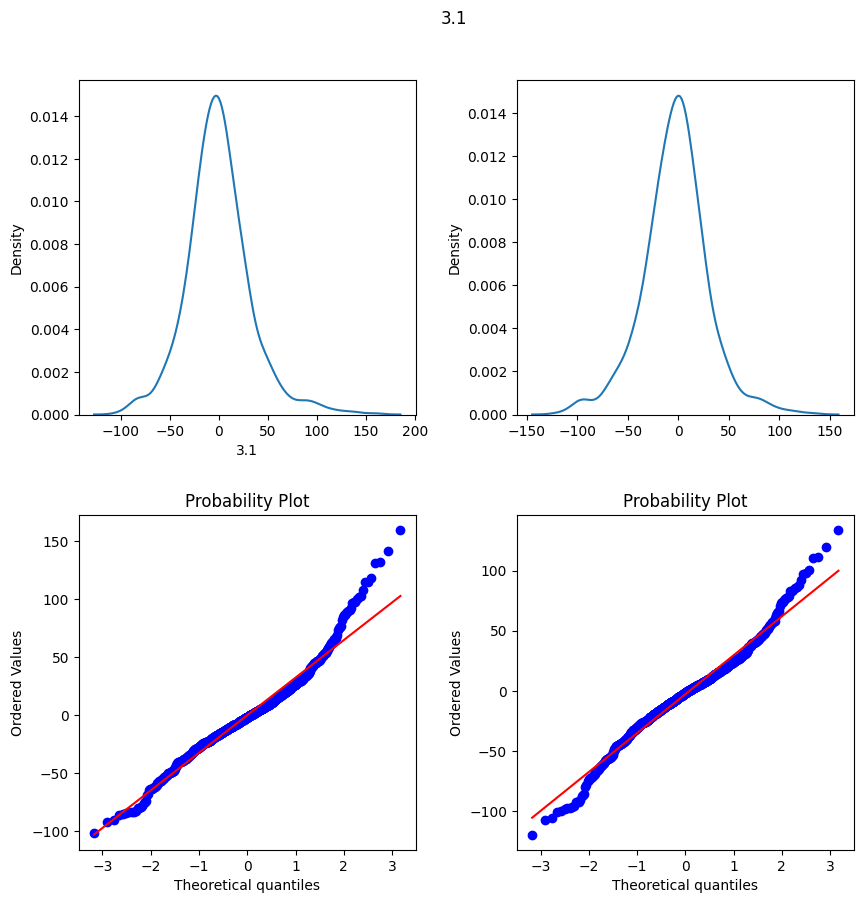

After yeo-johnsson transform, 3.1 is not normally distributed


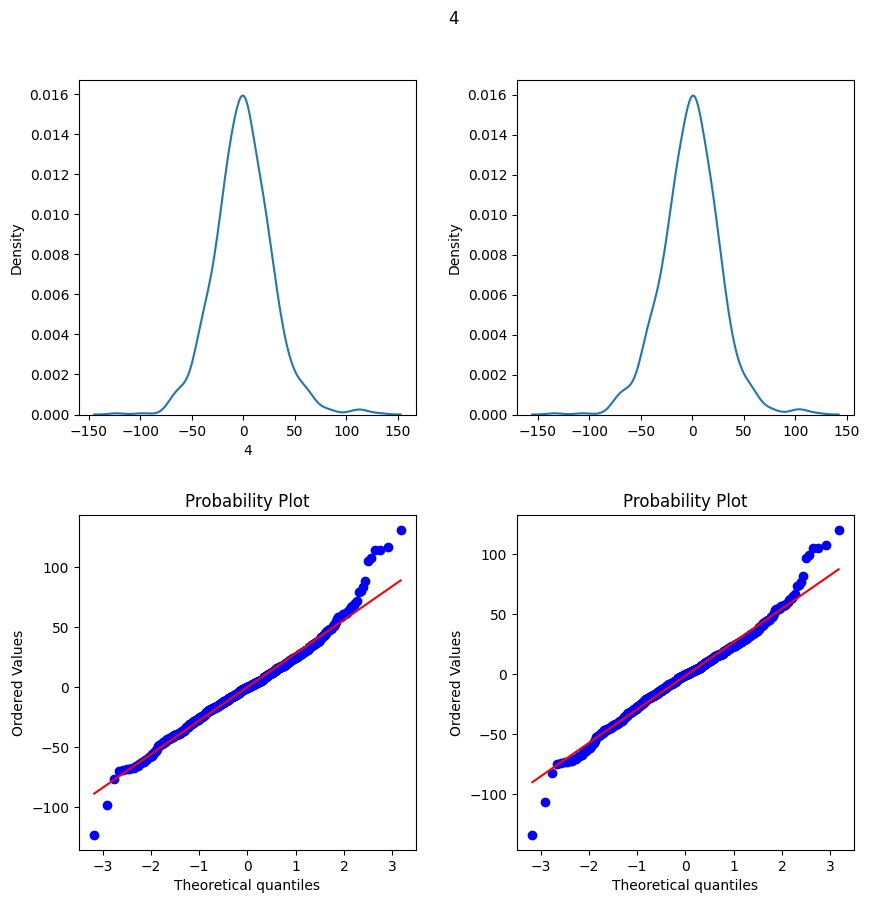

After yeo-johnsson transform, 4 is not normally distributed


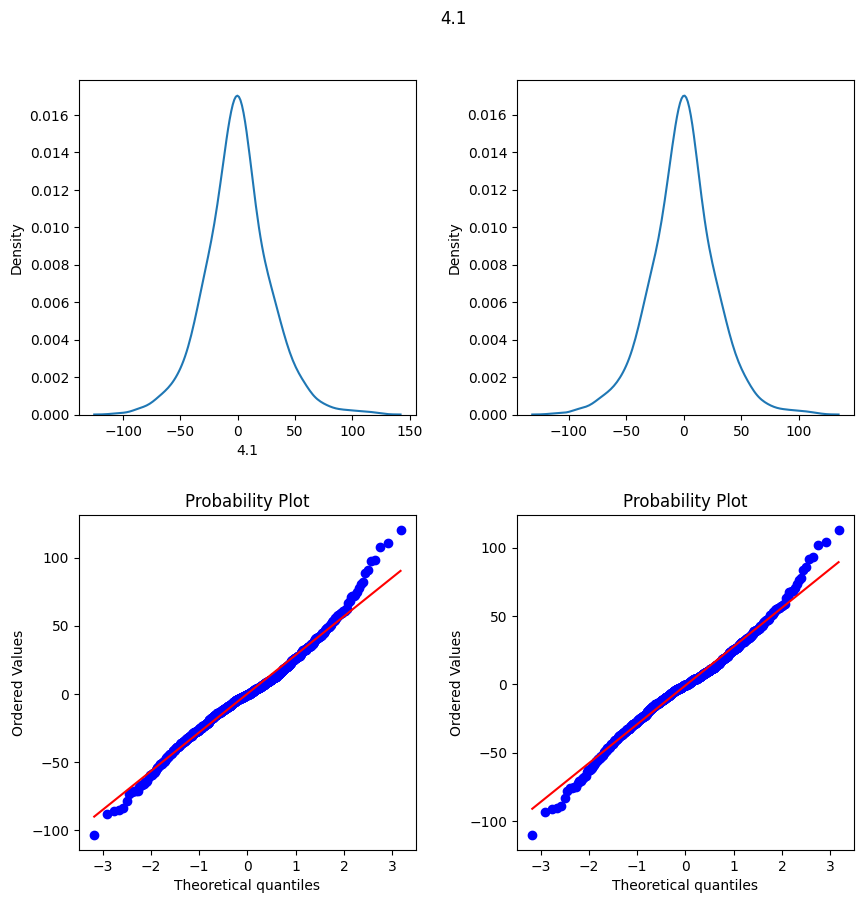

After yeo-johnsson transform, 4.1 is not normally distributed
List of columns not normally distributed after yeo-johnsson transformation: ['1', '1.1', '2', '2.1', '3', '3.1', '4', '4.1']


In [24]:
non_normal_remain = []
for column in non_normal:
    xt, _ = st.yeojohnson(data[column])
    f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10,10))
    sns.kdeplot(data = data[column], ax=ax1[0])
    st.probplot(data[column], dist='norm', plot=ax2[0])
    sns.kdeplot(data = xt, ax=ax1[1])
    st.probplot(xt, dist='norm', plot=ax2[1])
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.suptitle(column, y=0.95)
    plt.show()
    result = st.anderson(xt,'norm')
    if result[0]>result[1][2]:
        print(f"After yeo-johnsson transform, {column} is not normally distributed")
        non_normal_remain.append(column)
    else:
        print(f"After yeo-johnsson transform, {column} is normally distributed")
print(f"List of columns not normally distributed after yeo-johnsson transformation: {non_normal_remain}")

In [25]:
# Computing z score
st.norm.ppf(0.975)

1.959963984540054

In [26]:
# Computing probability (left-area under curve of standard normal distribution (default))
st.norm.cdf(-2.25)

0.012224472655044696

## Exact Sampling Distribution

For smaller sample size less than 30, probability distribution of a sample statistic obtained from a number of samples drawn from a specific population may or may not follow a normal distribution. However, as sample size increases, probability distribution of sample statistic will approach normal distribution behaviour.

Examples of exact sampling distribution:
1. T distribution
2. Chi Square distribution
3. F distribution

## T Distribution

T distribution is similar to normal distribution with bell shaped curve, except it is thicker and longer on both end tails of the curve.

<b>When population variance is unknown and sample size is not large enough (<30), t distribution is suitable to use.</b>

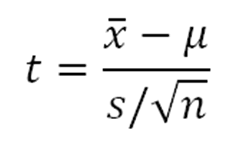

<img src="https://www.investopedia.com/thmb/ZzCZM3d2gR-OtbCmN5ift5xBrww=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/norm_vs_t2-1024x941-f3559a8fd4e947d49723541273a7d162.png" width="400">

Application of T distribution:
1. 1-sample T Test of sample mean (n-1 degrees of freedom) - Part 3
2. 2-sample T Test for difference between two sample means (n-1 degrees of freedom) - Part 3
3. Test for significance of sample correlation coefficient (n-2 degrees of freedom)
4. Test for significance of sample partial correlation coefficient (n-k-2 degrees of freedom)
5. Test for signficance of sample regression coefficient (n-2 degrees of freedom)

In [27]:
# T-test for signficance of pearson correlation coefficient
st.pearsonr([3,4,5,6,7,8,9],[1,65,2,34,2,1,10])

(-0.3180443822758944, 0.4869591186273867)

## Chi Square Distribution

Chi square distribution focuses on count of items belonging to specific categories, while measuring <b>extent of difference between actual and expected counts</b>.

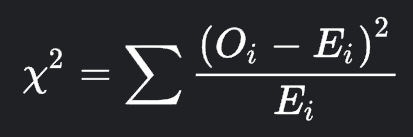

<b>Note that square of standard normal variable follows chi-square distribution with 1 degree of freedom.</b>

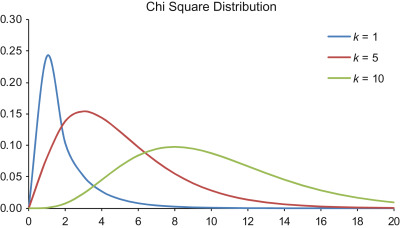

Application of chi-squared distribution (Part 3):
1. Test for significance of single population variance
2. Goodness of fit test
3. Bartlett test (Test for significance of equal variance)

## F Distribution

F distribution is similar to chi square distribution, except that F distribution measures <b>extent of difference between actual and expected continuous values</b>.

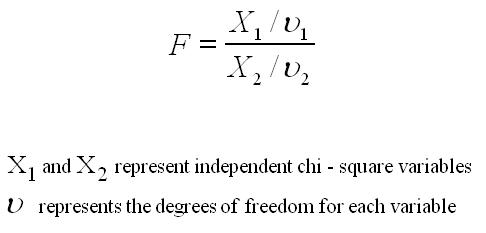

Application of F distribution:
1. ANOVA (Analysis of Variance) test - Part 3
2. Test for significance of multiple correlation (combined linear effect) coefficient
3. Test for signficance of multiple linear regression equation (based on R-squared value)

## Power Law Distribution (Pareto)

Power Law explains the relationship between two numerical variables, where a relative change in one variable results in proportonal change of the other variable.

This law is especially applicable to Pareto distribution, where 80% of outcomes are due to 20% of causes. Examples related to Pareto distribution are hard disk drive error rates, standardized price returns on individual stocks and length distribution in jobs assigned to supercomputers.

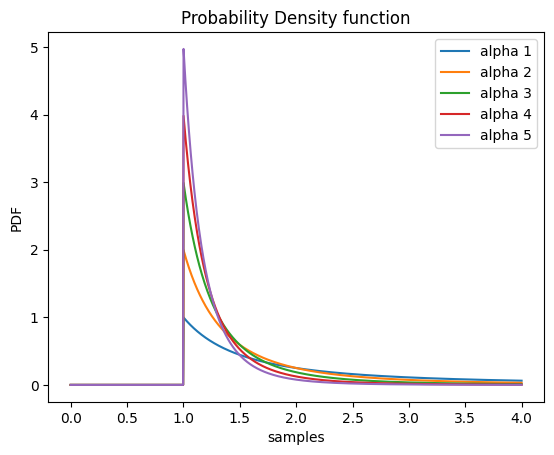

In [28]:
# Example of Pareto distribution
alpha = [1, 2, 3,4,5] #list of values of shape parameters
samples = np.linspace(start=0, stop=4, num=1000)
for a in alpha:
    output = np.array([st.pareto.pdf(x=samples, b=a, loc=0, scale=1)])
    plt.plot(samples, output.T, label='alpha {0}' .format(a))
plt.xlabel('samples')
plt.ylabel('PDF')
plt.title('Probability Density function')
plt.rcParams["figure.figsize"] = [8,8]
plt.legend(loc='best')
plt.show()

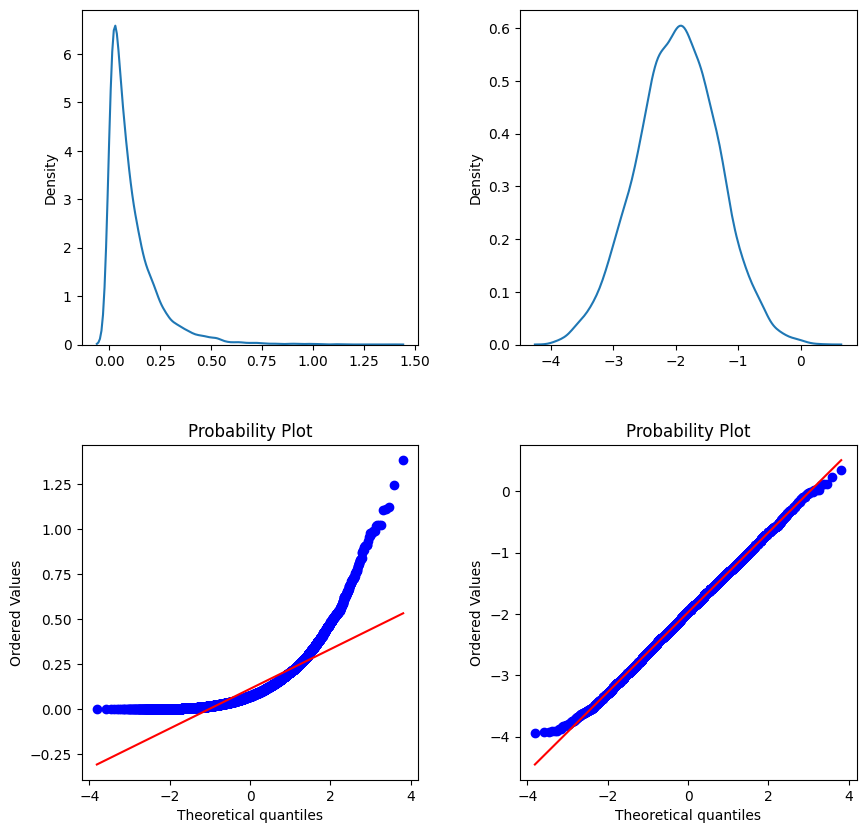

In [29]:
# Comparison between Pareto distribution before and after box-cox transformation
pareto_values = np.random.pareto(10,size=10000)
transformed_pareto, _ = st.boxcox(pareto_values)

f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10,10))
sns.kdeplot(data = pareto_values, ax=ax1[0])
st.probplot(pareto_values, dist='norm', plot=ax2[0])
sns.kdeplot(data = transformed_pareto, ax=ax1[1])
st.probplot(transformed_pareto, dist='norm', plot=ax2[1])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## LogNormal Distribution

Sometimes, the original data is not normally distributed, such that it is right skewed. However, taking the natural logarithm of the data results in normal distribution.

Thus, this type of distribution is known as lognormal distribution, which is one of the useful methods of data distributions to make variables normally distributed.

The following code below shows the comparison between normal distribution and lognormal distribution:

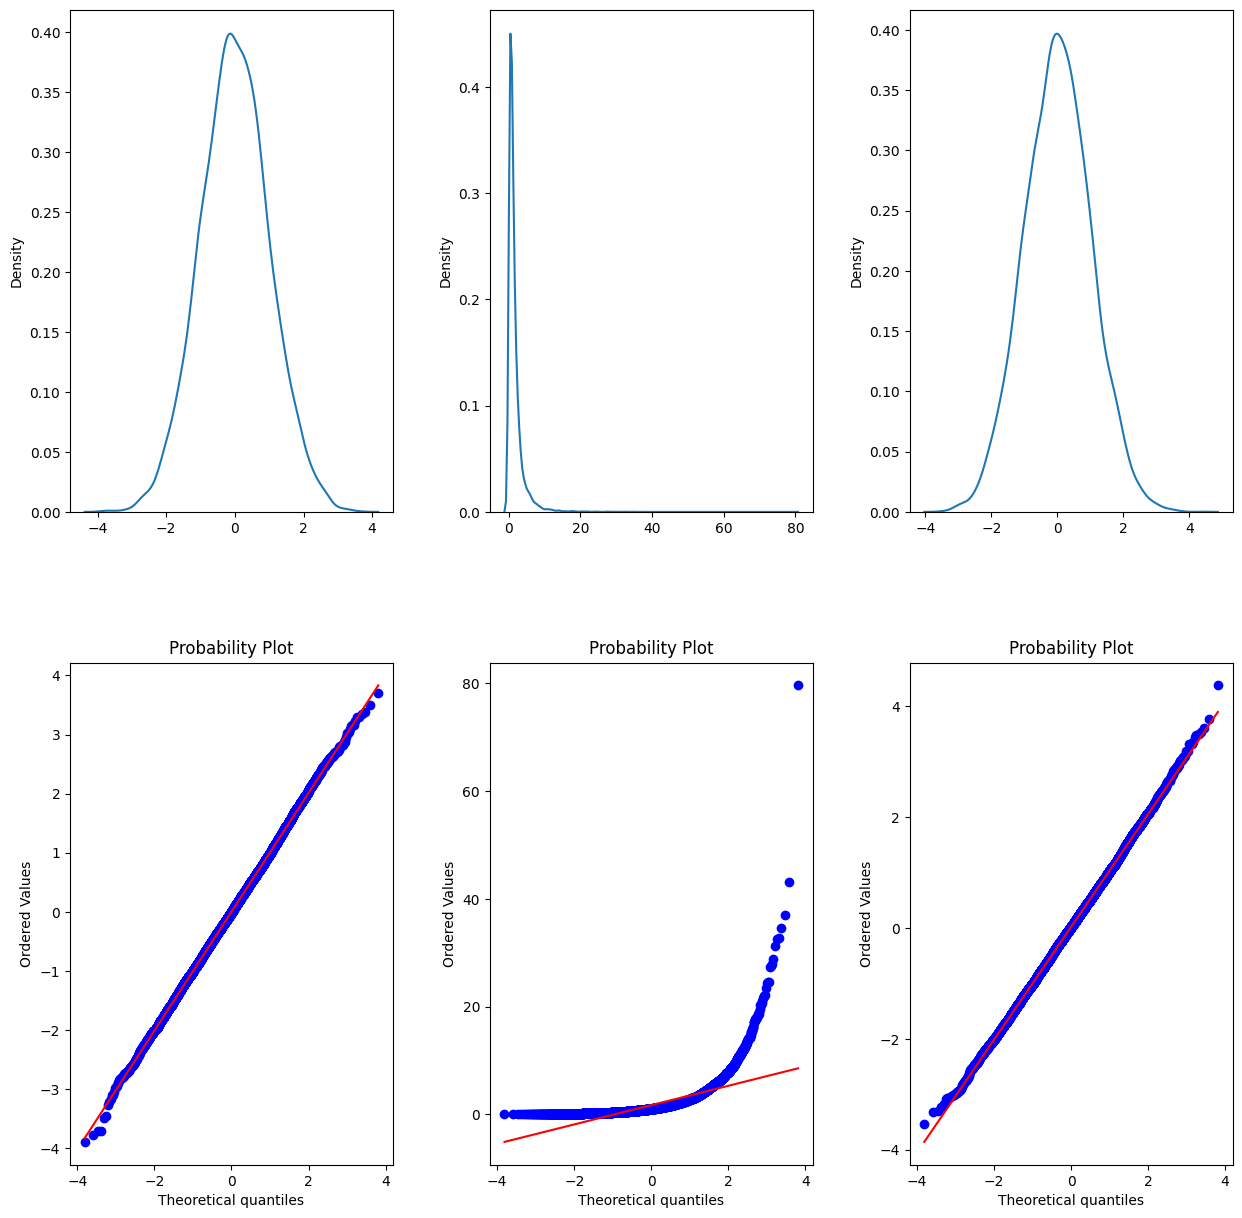

In [30]:
# Comparison between normal distribution, lognormal distribution before and after log transformation
normal_values = np.random.normal(size=10000)
lognormal_values = np.random.lognormal(size=10000)

f, (ax1, ax2) = plt.subplots(2, 3, figsize=(15,15))
sns.kdeplot(data = normal_values, ax=ax1[0])
st.probplot(normal_values, dist='norm', plot=ax2[0])
sns.kdeplot(data = lognormal_values, ax=ax1[1])
st.probplot(lognormal_values, dist='norm', plot=ax2[1])
sns.kdeplot(data = np.log(lognormal_values), ax=ax1[2])
st.probplot(np.log(lognormal_values), dist='norm', plot=ax2[2])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()